In [13]:
import requests
import layoutparser as lp

In [14]:
# Download a test PDF
r = requests.get("https://arxiv.org/pdf/2106.00676.pdf")
with open("test.pdf", 'wb') as fp:
    fp.write(r.content)

In [15]:
pdf_tokens, pdf_images = lp.load_pdf("test.pdf", load_images=True)

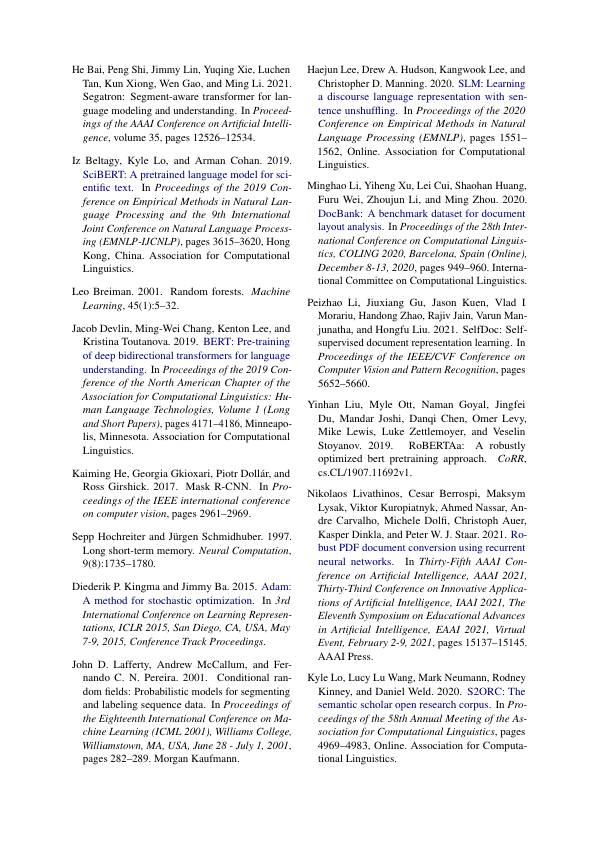

In [16]:
pdf_images[11]

In [17]:
%pwd

'/Users/yuyu/Fork_git/layout-model-training'

In [29]:
model = lp.Detectron2LayoutModel(
    config_path = "trained-model/fast_trained_complete/config.yaml",
    model_path = "trained-model/fast_trained_complete/model_final.pth",
    extra_config = ["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8] # <-- Only output high accuracy preds
)

In [30]:
layout = model.detect(pdf_images[11])

/opt/anaconda3/envs/translation/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


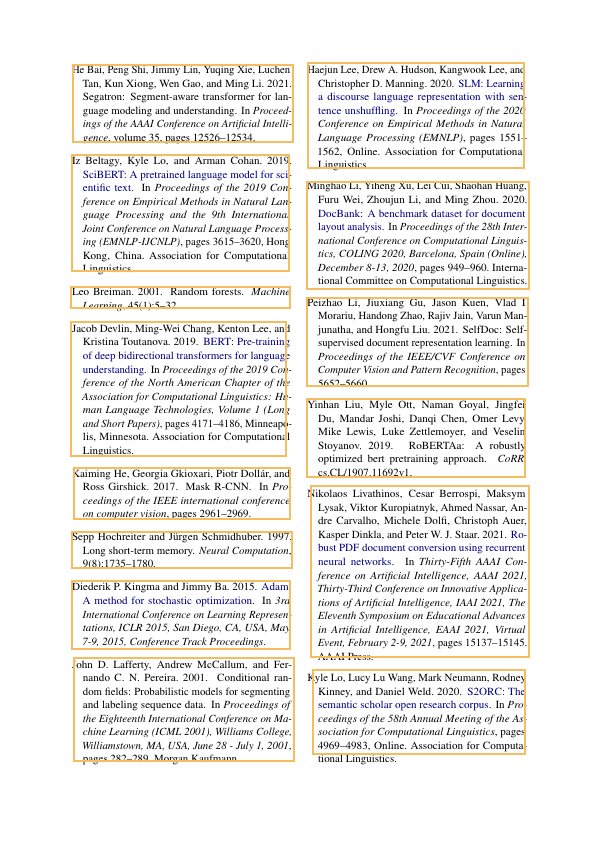

In [31]:
lp.draw_box(pdf_images[11], layout)